## A1: Intraclass Spread and Interclass Distances
Mean of Class 0: [4298.40255177 4013.0837556  4262.46292237 4200.39138791 4341.75263292
 4664.72600097 4140.38739009 4615.39349279 4200.36718057 4229.69502604
 4200.26482621 4277.43478261 4600.89988212 4456.56728594]
Mean of Class 1: [4350.79851703 4005.69499926 4265.93777927 4121.41369627 4341.72688086
 4618.59477168 4073.57068422 4616.87168675 4241.49796371 4233.30727949
 4205.14914324 4281.4410174  4632.77489216 4367.14750707]

Standard Deviation of Class 0: [  71.72268987   54.00287221   49.16920113 7025.65314623   42.10743268
 3939.19440617 6196.67684531   35.72116215   48.37751687   47.99403379
   35.94200814   48.44605701   77.425933   7934.5873245 ]
Standard Deviation of Class 1: [3718.75476879   33.02614544   37.70796759   26.52547161   22.60869691
   18.99099193   34.21108732   18.53149908 3188.3269611    19.74065744
   39.76670992   30.88721876 1801.48360054   35.72066429]

Distance between class means: 162.4833
-------------

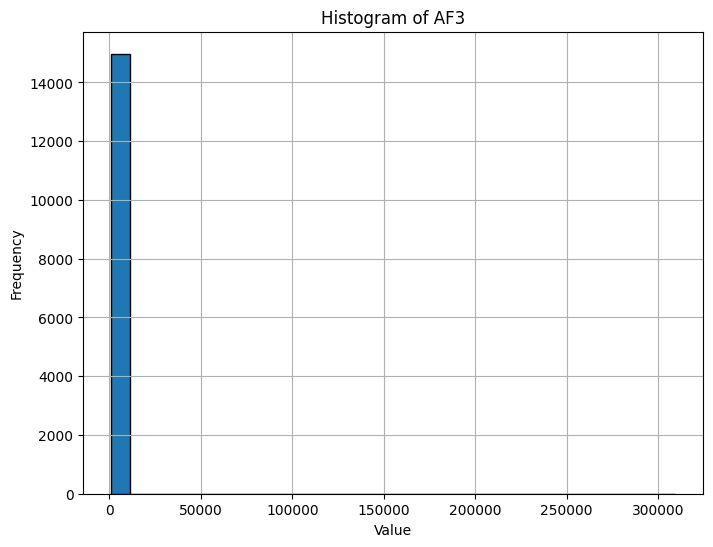

Analysis for feature: 'AF3'
Mean: 4321.9178
Variance: 6210009.1407
--------------------------------------------------
## A3: Minkowski Distance


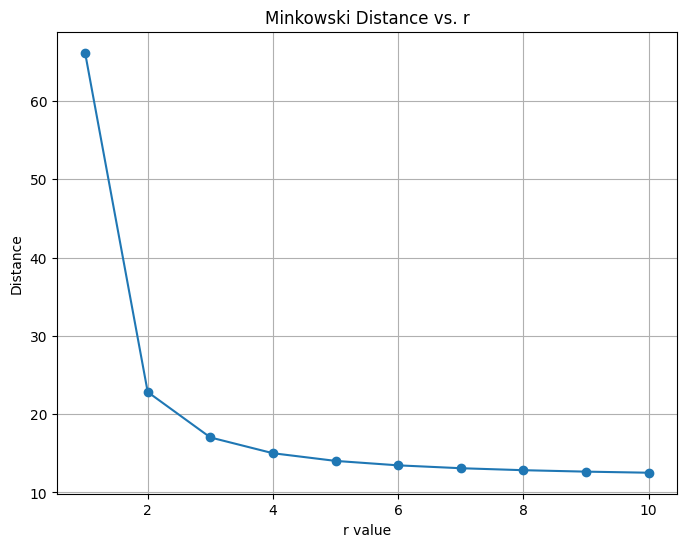

Plotted Minkowski distances for r from 1 to 10.
--------------------------------------------------
## A4: Train-Test Split
Training set size: 10486 samples
Test set size: 4494 samples
--------------------------------------------------
## A5: Train k-NN Classifier (k=3)
k-NN classifier with k=3 has been trained.
--------------------------------------------------
## A6: Test Accuracy of k-NN (k=3)
Accuracy of the k-NN classifier (k=3) on the test set: 0.9722
--------------------------------------------------
## A7: Prediction with k-NN (k=3)
Prediction for the first vector in the test set: 1
Actual label for that vector: 1
--------------------------------------------------
## A8: Compare k-NN for Different k Values


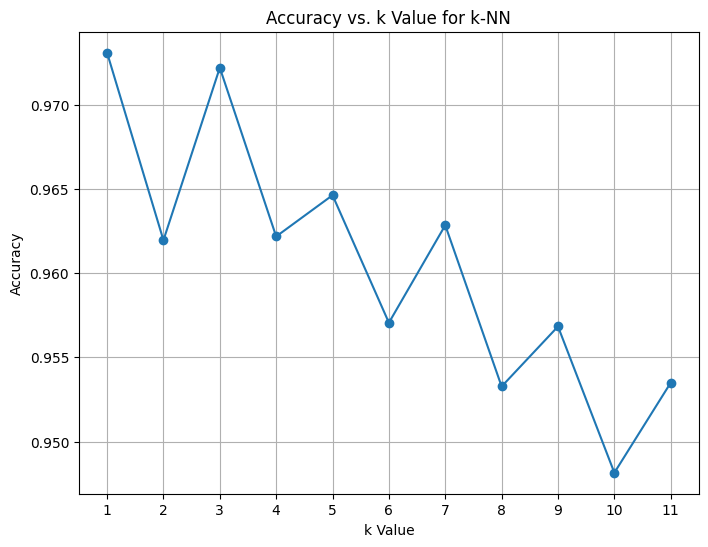

Accuracy plot for k from 1 to 11 has been generated.
--------------------------------------------------
## A9: Confusion Matrix and Performance Metrics

--- Performance on Test Data (k=3) ---
Accuracy: 0.9722
Precision: 0.9778
Recall: 0.9625
F1-Score: 0.9701
Confusion Matrix:
[[2340   46]
 [  79 2029]]

--- Performance on Training Data (k=3) ---
Accuracy: 0.9895
Precision: 0.9885
Recall: 0.9876
F1-Score: 0.9881
Confusion Matrix:
[[5818   53]
 [  57 4558]]

--- Model Fit Inference ---
The model has a REGULAR FIT.
Training and test accuracies are close, indicating good generalization.
--------------------------------------------------


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def load_data(filepath):
    df = pd.read_csv(r"/content/EEG_Eye_State_Classification.csv")
    X = df.drop('eyeDetection', axis=1).values
    y = df['eyeDetection'].values
    return X, y

def calculate_class_stats(X, y):
    class_labels = np.unique(y)
    class_means = [np.mean(X[y == label], axis=0) for label in class_labels]
    class_stds = [np.std(X[y == label], axis=0) for label in class_labels]
    distance_between_means = np.linalg.norm(class_means[0] - class_means[1])
    return class_means, class_stds, distance_between_means

def plot_feature_histogram(feature_vector, feature_name):
    plt.figure(figsize=(8, 6))
    plt.hist(feature_vector, bins=30, edgecolor='black')
    plt.title(f'Histogram of {feature_name}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    mean_val = np.mean(feature_vector)
    variance_val = np.var(feature_vector)
    return mean_val, variance_val

def calculate_minkowski_distances(vec1, vec2, r_values):
    distances = [np.linalg.norm(vec1 - vec2, ord=r) for r in r_values]
    return distances

def plot_minkowski_distances(r_values, distances):
    plt.figure(figsize=(8, 6))
    plt.plot(r_values, distances, marker='o')
    plt.title('Minkowski Distance vs. r')
    plt.xlabel('r value')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.show()

def train_knn_classifier(X_train, y_train, k):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    return classifier

def evaluate_classifier(classifier, X_data, y_data):
    y_pred = classifier.predict(X_data)
    accuracy = accuracy_score(y_data, y_pred)
    precision = precision_score(y_data, y_pred)
    recall = recall_score(y_data, y_pred)
    f1 = f1_score(y_data, y_pred)
    cm = confusion_matrix(y_data, y_pred)
    return accuracy, precision, recall, f1, cm

def plot_accuracy_vs_k(k_values, accuracies):
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, accuracies, marker='o')
    plt.title('Accuracy vs. k Value for k-NN')
    plt.xlabel('k Value')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    FILEPATH = 'EEG_Eye_State_Classification.csv'
    X, y = load_data(FILEPATH)
    feature_names = pd.read_csv(FILEPATH).columns[:-1]

    print("## A1: Intraclass Spread and Interclass Distances")
    class_means, class_stds, dist_means = calculate_class_stats(X, y)
    print(f"Mean of Class 0: {class_means[0]}")
    print(f"Mean of Class 1: {class_means[1]}")
    print(f"\nStandard Deviation of Class 0: {class_stds[0]}")
    print(f"Standard Deviation of Class 1: {class_stds[1]}")
    print(f"\nDistance between class means: {dist_means:.4f}")
    print("-" * 50)

    print("## A2: Feature Histogram, Mean, and Variance")
    selected_feature_index = 0
    selected_feature_name = feature_names[selected_feature_index]
    feature_mean, feature_variance = plot_feature_histogram(X[:, selected_feature_index], selected_feature_name)
    print(f"Analysis for feature: '{selected_feature_name}'")
    print(f"Mean: {feature_mean:.4f}")
    print(f"Variance: {feature_variance:.4f}")
    print("-" * 50)

    print("## A3: Minkowski Distance")
    vec_a = X[0]
    vec_b = X[1]
    r_range = range(1, 11)
    minkowski_dists = calculate_minkowski_distances(vec_a, vec_b, r_range)
    plot_minkowski_distances(r_range, minkowski_dists)
    print("Plotted Minkowski distances for r from 1 to 10.")
    print("-" * 50)

    print("## A4: Train-Test Split")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Test set size: {X_test.shape[0]} samples")
    print("-" * 50)

    print("## A5: Train k-NN Classifier (k=3)")
    knn_k3 = train_knn_classifier(X_train, y_train, k=3)
    print("k-NN classifier with k=3 has been trained.")
    print("-" * 50)

    print("## A6: Test Accuracy of k-NN (k=3)")
    accuracy_k3 = knn_k3.score(X_test, y_test)
    print(f"Accuracy of the k-NN classifier (k=3) on the test set: {accuracy_k3:.4f}")
    print("-" * 50)

    print("## A7: Prediction with k-NN (k=3)")
    sample_vector = X_test[0].reshape(1, -1)
    prediction = knn_k3.predict(sample_vector)
    print(f"Prediction for the first vector in the test set: {prediction[0]}")
    print(f"Actual label for that vector: {y_test[0]}")
    print("-" * 50)

    print("## A8: Compare k-NN for Different k Values")
    k_range = range(1, 12)
    accuracies = []
    for k in k_range:
        knn = train_knn_classifier(X_train, y_train, k)
        acc = knn.score(X_test, y_test)
        accuracies.append(acc)
    plot_accuracy_vs_k(k_range, accuracies)
    print("Accuracy plot for k from 1 to 11 has been generated.")
    print("-" * 50)

    print("## A9: Confusion Matrix and Performance Metrics")
    print("\n--- Performance on Test Data (k=3) ---")
    acc_test, prec_test, rec_test, f1_test, cm_test = evaluate_classifier(knn_k3, X_test, y_test)
    print(f"Accuracy: {acc_test:.4f}")
    print(f"Precision: {prec_test:.4f}")
    print(f"Recall: {rec_test:.4f}")
    print(f"F1-Score: {f1_test:.4f}")
    print(f"Confusion Matrix:\n{cm_test}")

    print("\n--- Performance on Training Data (k=3) ---")
    acc_train, prec_train, rec_train, f1_train, cm_train = evaluate_classifier(knn_k3, X_train, y_train)
    print(f"Accuracy: {acc_train:.4f}")
    print(f"Precision: {prec_train:.4f}")
    print(f"Recall: {rec_train:.4f}")
    print(f"F1-Score: {f1_train:.4f}")
    print(f"Confusion Matrix:\n{cm_train}")

    print("\n--- Model Fit Inference ---")
    if acc_train > acc_test and (acc_train - acc_test) > 0.1:
        print("The model appears to be OVERFITTING.")
        print("Training accuracy is significantly higher than test accuracy.")
    elif acc_train < 0.8:
        print("The model may be UNDERFITTING.")
        print("Both training and test accuracies are relatively low.")
    else:
        print("The model has a REGULAR FIT.")
        print("Training and test accuracies are close, indicating good generalization.")
    print("-" * 50)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')